In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df= pd.read_csv('Admission.csv')

In [3]:
df.head()

,ADMIT,GRE,GPA,RANK
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
df.shape

(400, 4)

In [5]:
target= df[['ADMIT']]

In [6]:
target

,ADMIT
0,0
1,1
2,1
3,1
4,0
...,...
395,0
396,0
397,0
398,0


In [7]:
features= df.drop('ADMIT',axis=1)

In [8]:
features

,GRE,GPA,RANK
0,380,3.61,3
1,660,3.67,3
2,800,4.00,1
3,640,3.19,4
4,520,2.93,4
...,...,...,...
395,620,4.00,2
396,560,3.04,3
397,460,2.63,2
398,700,3.65,2


In [9]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(300, 3)
(300, 1)
(100, 3)
(100, 1)


In [11]:
log_reg= LogisticRegression()

In [12]:
log_reg.fit(x_train,y_train)

C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [13]:
log_reg.predict_proba(x_test)

array([[0.68252193, 0.31747807],
       [0.87744779, 0.12255221],
       [0.48256058, 0.51743942],
       [0.86679746, 0.13320254],
       [0.93027558, 0.06972442],
       [0.69139854, 0.30860146],
       [0.61164889, 0.38835111],
       [0.82789895, 0.17210105],
       [0.78305594, 0.21694406],
       [0.73953192, 0.26046808],
       [0.88266987, 0.11733013],
       [0.58036674, 0.41963326],
       [0.84853288, 0.15146712],
       [0.73136097, 0.26863903],
       [0.62976917, 0.37023083],
       [0.86314428, 0.13685572],
       [0.58562528, 0.41437472],
       [0.88252094, 0.11747906],
       [0.82980417, 0.17019583],
       [0.83263704, 0.16736296],
       [0.87632849, 0.12367151],
       [0.70645687, 0.29354313],
       [0.60348332, 0.39651668],
       [0.52062454, 0.47937546],
       [0.53629978, 0.46370022],
       [0.77364866, 0.22635134],
       [0.74850836, 0.25149164],
       [0.71602515, 0.28397485],
       [0.81709857, 0.18290143],
       [0.84547159, 0.15452841],
       [0.

In [14]:
y_pred= log_reg.predict(x_test
                       )

In [15]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [16]:
accuracy_score(y_test,y_pred)

0.63

In [17]:
confusion_matrix(y_test,y_pred)

array([[58,  6],
       [31,  5]], dtype=int64)

In [19]:
## Changing the thershold value

In [24]:
y_pred_new= [0 if x[0]>=0.6 else 1 for x in log_reg.predict_proba(x_test)]

In [25]:
accuracy_score(y_test,y_pred_new)

0.64

In [31]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[58,  6],
       [31,  5]], dtype=int64)

In [28]:
y_test.value_counts()

ADMIT
0        64
1        36
dtype: int64

In [30]:
pd.DataFrame(y_pred).value_counts()

0    89
1    11
dtype: int64

In [32]:
import seaborn as sns

Text(50.722222222222214, 0.5, 'Actual_value')

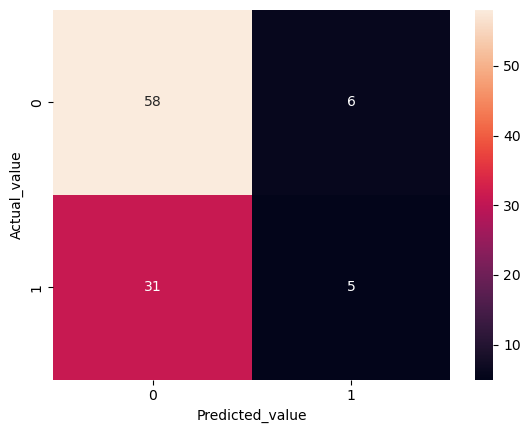

In [34]:
sns.heatmap(conf, annot=True)
plt.xlabel('Predicted_value')
plt.ylabel('Actual_value')